# Домашняя работа №1

**Срок сдачи:** 30 сентября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем формате: <br\>
** [ИАД] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

In [44]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [2]:
titanium = pd.read_csv("titanium.csv")
print ("CSV shape: {0}".format(titanium.shape))

CSV shape: (49, 2)


In [3]:
titanium.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [4]:
X = titanium.x.reshape(-1,1)
Y = titanium.y

In [5]:
X = (X-X.mean())/X.std()

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

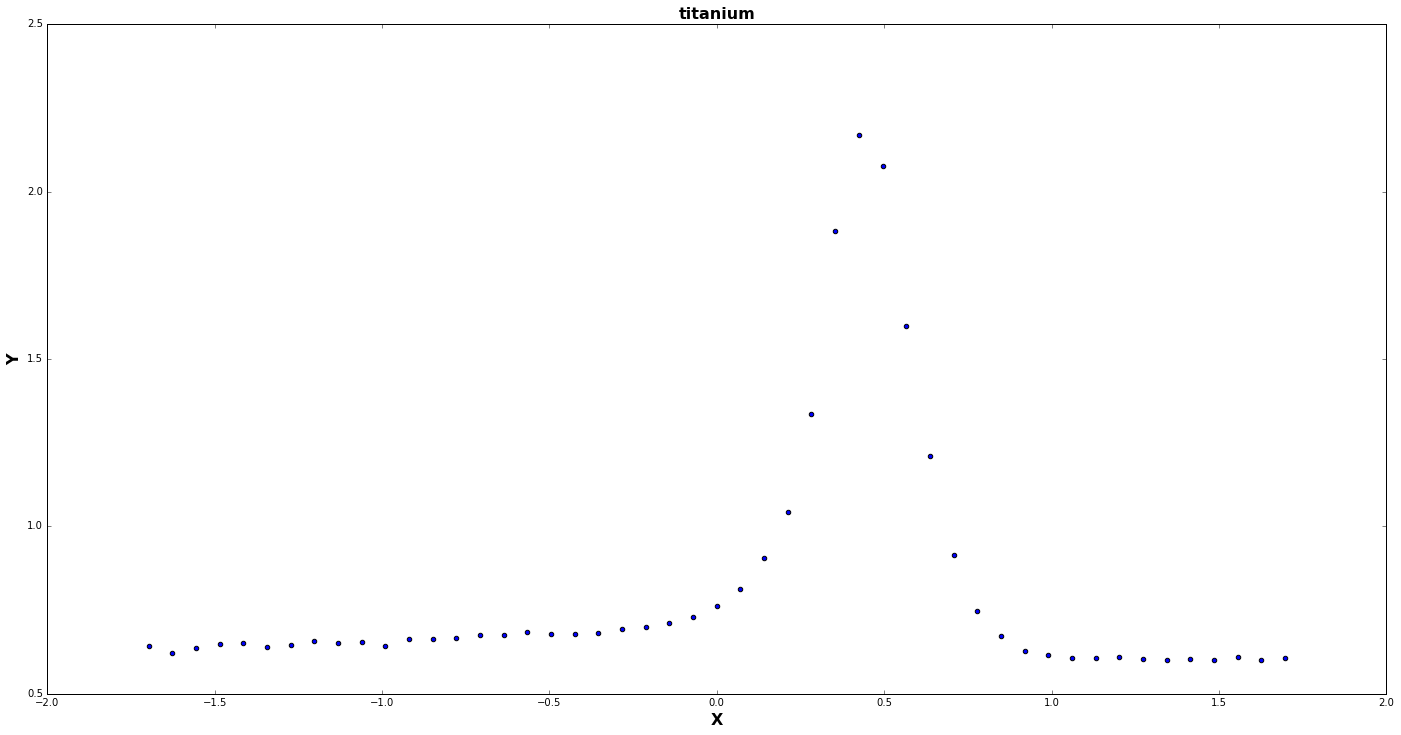

In [6]:
plt.figure(figsize=(24,12));
plt.scatter(X, Y);
plt.title('titanium', fontsize=16, weight='bold');
plt.xlabel('X', fontsize=16, weight='bold');
plt.ylabel('Y', fontsize=16, weight='bold');

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [7]:
from sklearn.svm import SVR

**Подготовим функции**

Функция для удобного нахождения лучшего значения параметра С и списка значений MAE для любога ядра и списка значений параметра:

In [9]:
def fit_svm(kernel, C_list):
    mae_values = []
    for c in C_list:
        svm = SVR(kernel=kernel, C=c, degree=3, gamma=7, epsilon=0.01, coef0=1)
        svm.fit(X,Y)
        ans = svm.predict(X)
        error = mean_absolute_error(Y, ans)
        mae_values.append(error)
    return (
            C_list[np.argmin(mae_values)],
            mae_values
    )

Функция для построения графика зависимости МАЕ от параметра:

In [10]:
def error_plot(C_list, errors):
    plt.figure(figsize=(24,12))
    plt.plot(C_list, errors)
    plt.xscale('log')
    plt.xlabel('C value', fontsize=16, weight='bold')
    plt.ylabel('Error value', fontsize=16, weight='bold')

Функция для построения графика предсказанных значений с лучшим параметром С:

In [11]:
def prediction_plot(kernel, c):
    svm = SVR(kernel = kernel, C=c, degree=3, gamma=7, epsilon=0.01, coef0=1)
    svm.fit(X,Y)
    prediction = svm.predict(X)
    
    plt.figure(figsize=(24,12))
    plt.plot(X, prediction)
    plt.title('{} predictions'.format(kernel), fontsize=16, weight='bold')
    plt.plot(X,Y)

In [12]:
C_values = np.logspace(-2, 2, 10)

**Линейное ядро**

In [13]:
linear = fit_svm('linear', C_values)

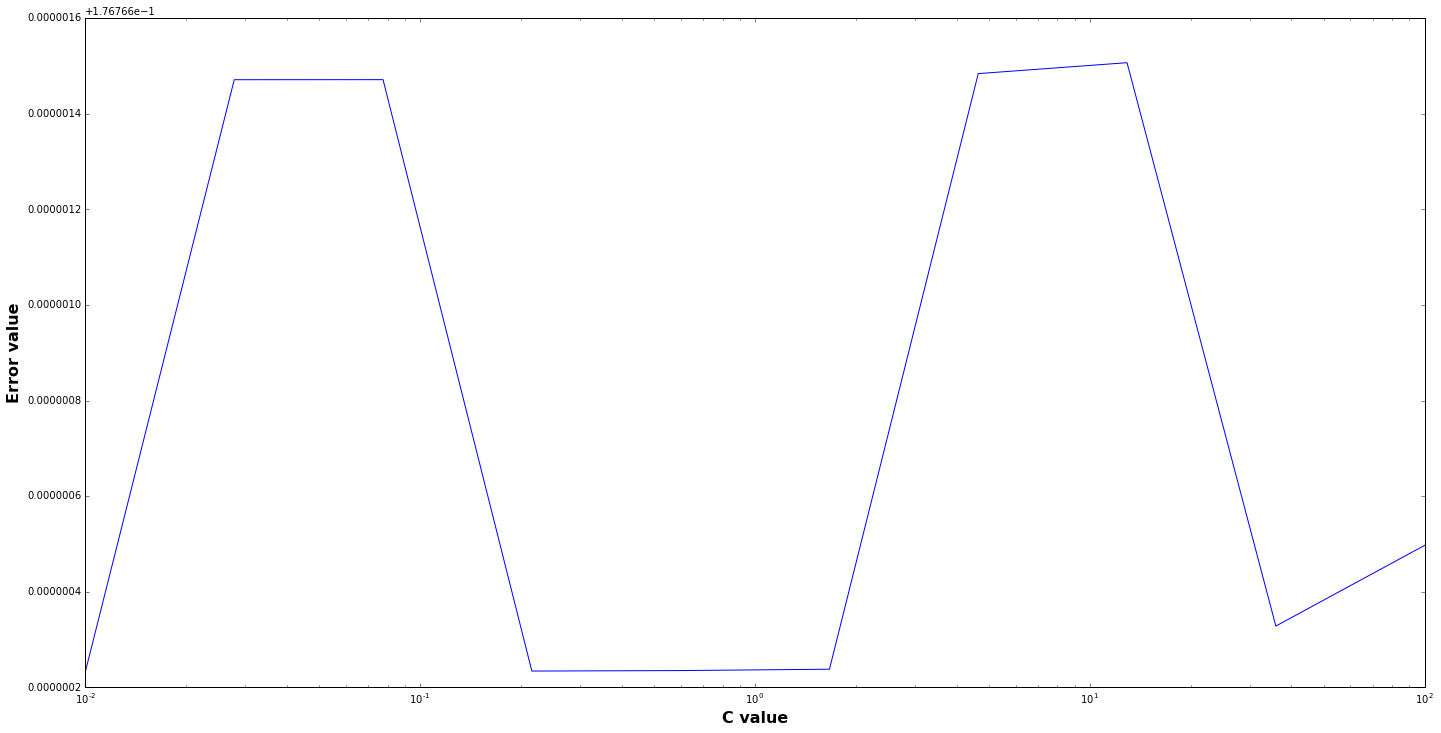

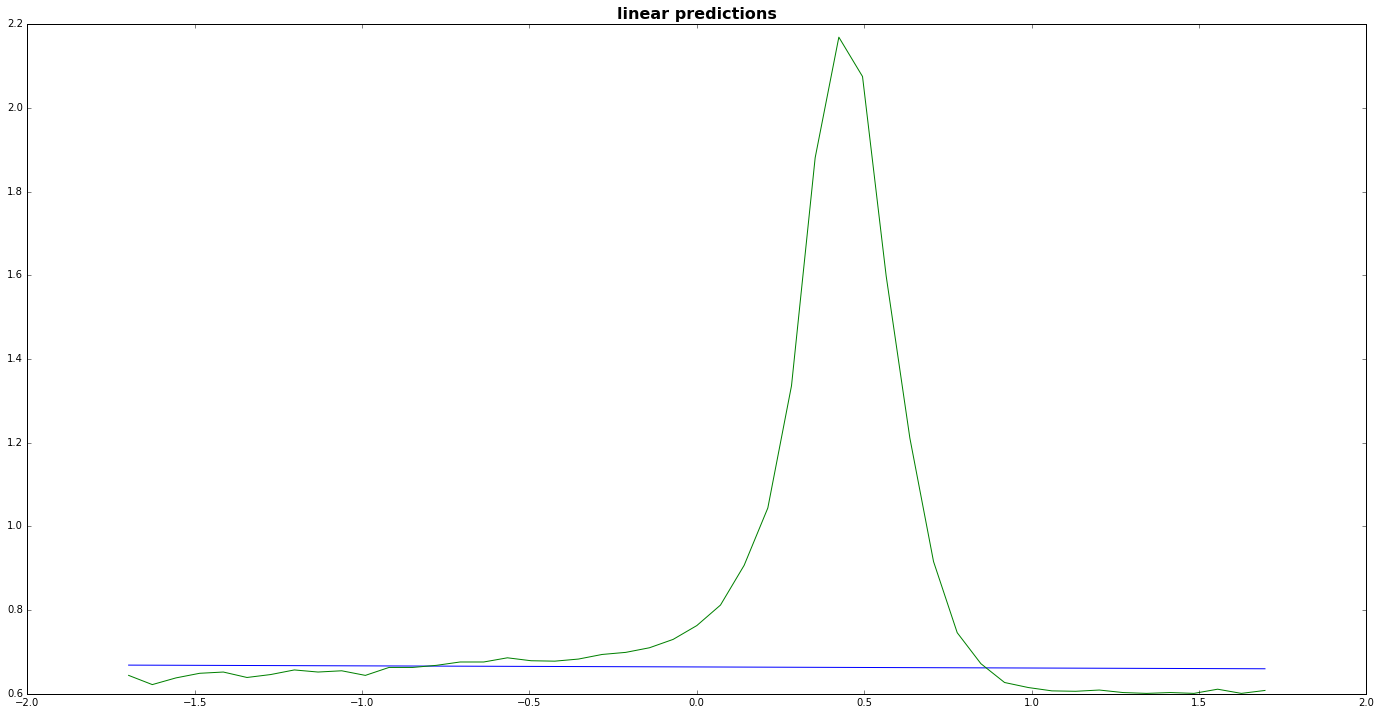

In [14]:
error_plot(C_values,linear[1])
prediction_plot('linear', linear[0])

**Полиномиальное ядро**

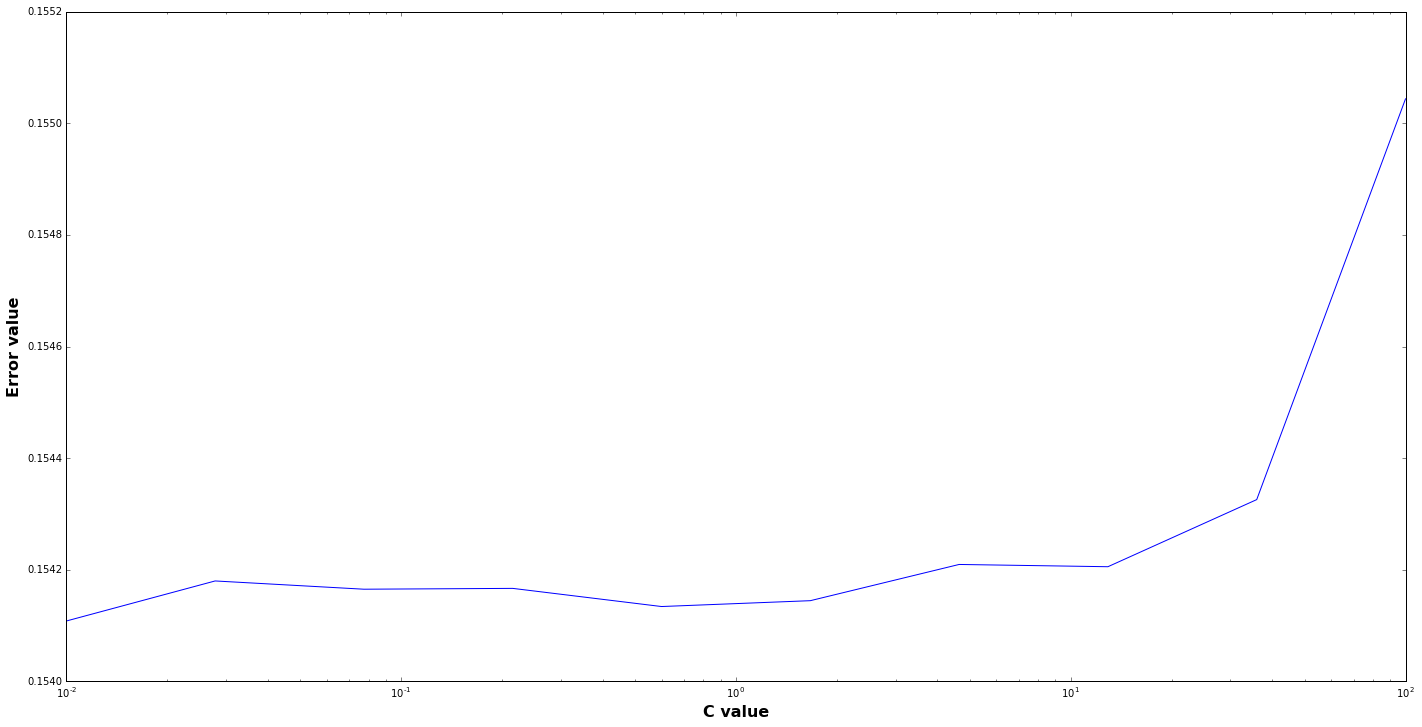

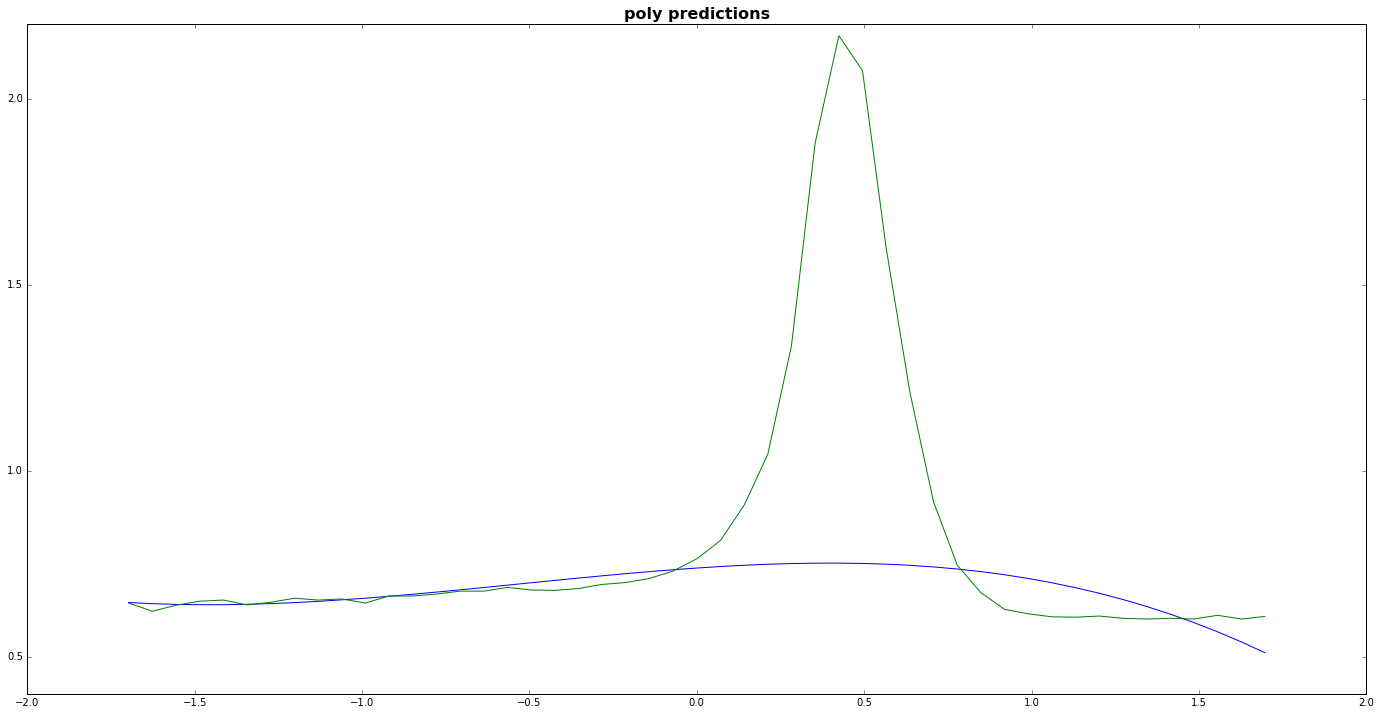

In [15]:
poly = fit_svm('poly', C_values)
error_plot(C_values,poly[1])
prediction_plot('poly', poly[0])

**RBF**

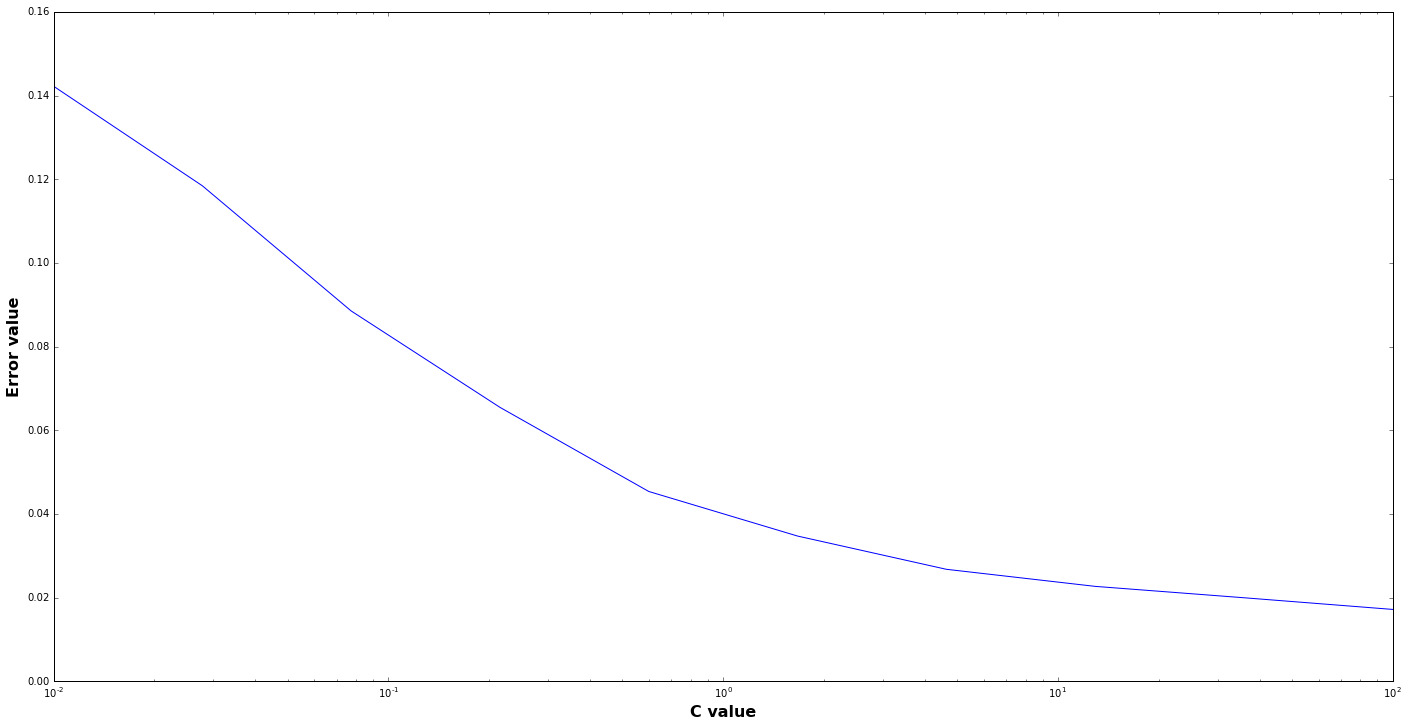

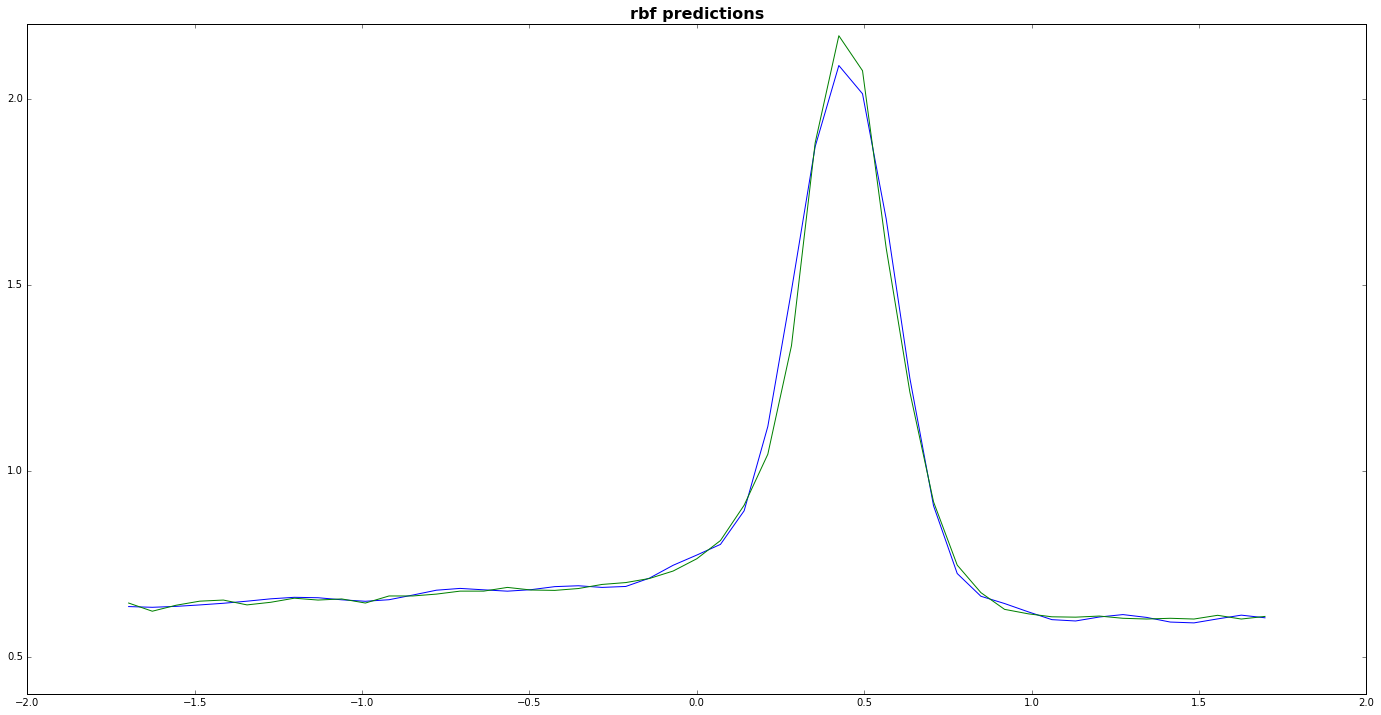

In [16]:
rbf = fit_svm('rbf', C_values)
error_plot(C_values,rbf[1])
prediction_plot('rbf', rbf[0])

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [23]:
en = pd.read_table('war_and_peace_en.txt', names=['word', 'label'])
en['label']=1

In [24]:
es = pd.read_table('war_and_peace_es.txt', names=['word', 'label'])
es['label']=0

In [25]:
es.shape, en.shape

((6359, 2), (5044, 2))

In [26]:
df = pd.concat((en, es), ignore_index=True)

In [27]:
df.head()

,word,label
0,war,1
1,and,1
2,peace,1
3,leo,1
4,tolstoy,1


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [28]:
df.shape

(11403, 2)

In [29]:
from sklearn.cross_validation import train_test_split

In [30]:
RND_SEED = 1234

In [31]:
df_sample = df.sample(n=1000, random_state=RND_SEED)
df_sample = df_sample.reset_index(drop=True)

In [32]:
train, test = train_test_split(df_sample, test_size=0.4)

In [34]:
train.shape, test.shape

((600, 2), (400, 2))

In [35]:
X_train = train.index.values
Y_train = train['label'].values

In [36]:
X_test = test.index.values
Y_test = test['label'].values

## Расчет ядра (3 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [37]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]

In [57]:
def string_kernel(U, V):
    U = U.flatten()
    V = V.flatten()
    G = np.empty([U.shape[0], V.shape[0]])
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            G[i, j] = np.exp(-wfi_levenshtein(df_sample.loc[U[i], 'word'], df_sample.loc[V[j], 'word']))
    return G

In [58]:
G = string_kernel(X_train, X_train)

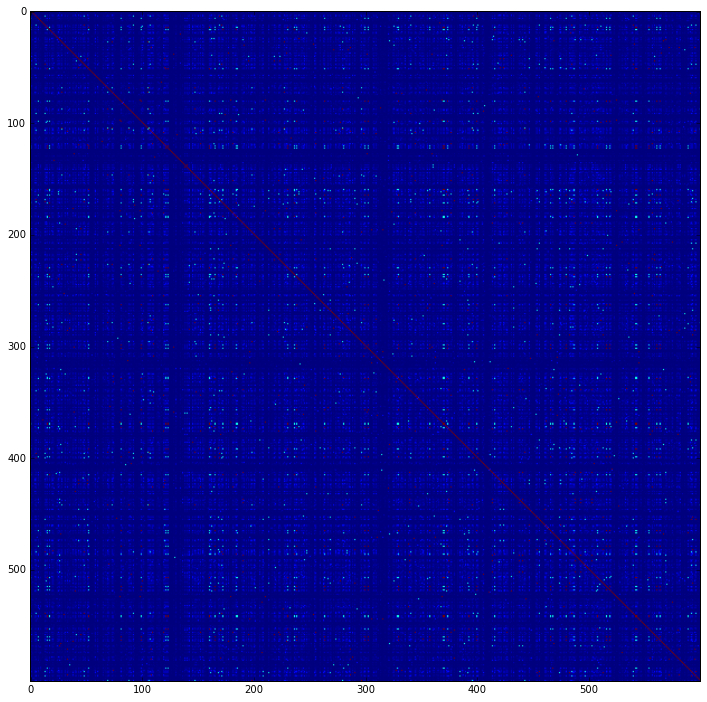

In [59]:
plt.figure(figsize=(24,12))
plt.imshow(G);

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [45]:
from sklearn.svm import SVC

In [52]:
X_train = X_train.reshape((-1,1))
X_test = X_test.reshape((-1,1))

In [65]:
for c in C_values:
    svc = SVC(kernel=string_kernel, C=c)
    svc.fit(X_train, Y_train)
    train_prediction = svc.predict(X_train)
    test_prediction = svc.predict(X_test)
    
    print("C = {}".format(c))
    print("\t Train accuracy = {}".format(accuracy_score(Y_train, train_prediction)))
    print("\t Test accuracy = {}\n".format(accuracy_score(Y_test, test_prediction)))

C = 0.01
	 Train accuracy = 0.6083333333333333
	 Test accuracy = 0.5325

C = 0.027825594022071243
	 Train accuracy = 0.6083333333333333
	 Test accuracy = 0.5325

C = 0.0774263682681127
	 Train accuracy = 0.6466666666666666
	 Test accuracy = 0.585

C = 0.21544346900318834
	 Train accuracy = 0.74
	 Test accuracy = 0.6725

C = 0.5994842503189409
	 Train accuracy = 0.9416666666666667
	 Test accuracy = 0.7525

C = 1.6681005372000592
	 Train accuracy = 0.99
	 Test accuracy = 0.8075

C = 4.6415888336127775
	 Train accuracy = 0.99
	 Test accuracy = 0.8075

C = 12.915496650148826
	 Train accuracy = 0.99
	 Test accuracy = 0.8075

C = 35.93813663804626
	 Train accuracy = 0.99
	 Test accuracy = 0.8075

C = 100.0
	 Train accuracy = 0.99
	 Test accuracy = 0.8075

